## DataSet feel

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [4]:
df_test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


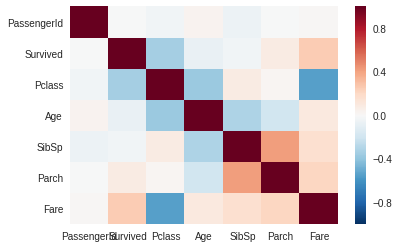

In [13]:
%matplotlib inline
sns.heatmap(df_train.corr())

In [11]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [18]:
def sex_num(x):
    if x["Sex"] == 'male':
        return 0
    elif x["Sex"] == 'female':
        return 1
    else:
        return 2
    
    

In [19]:
df_train['sex#'] = df_train.apply(sex_num,axis=1)

In [20]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,sex#
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


## Try Linear Regr

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lreg = LinearRegression()

In [23]:
x_col = ["Pclass","Age","SibSp","Parch","sex#"]
y_col = ["Survived"]

In [26]:
df_train[y_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
Survived    891 non-null int64
dtypes: int64(1)
memory usage: 7.0 KB


In [29]:
df_x_y = df_train[x_col+y_col].dropna()

In [31]:
df_x_y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 6 columns):
Pclass      714 non-null int64
Age         714 non-null float64
SibSp       714 non-null int64
Parch       714 non-null int64
sex#        714 non-null int64
Survived    714 non-null int64
dtypes: float64(1), int64(5)
memory usage: 39.0 KB


In [32]:
lreg.fit(df_x_y[x_col],df_x_y[y_col])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

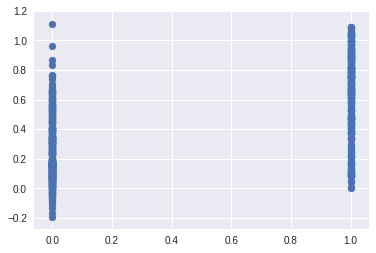

In [33]:
plt.scatter(df_x_y[y_col],lreg.predict(df_x_y[x_col]))

In [34]:
df_test['sex#'] = df_test.apply(sex_num,axis=1)

In [36]:
df_test[x_col].describe()

,Pclass,Age,SibSp,Parch,sex#
count,418.000000,332.000000,418.000000,418.000000,418.000000
mean,2.265550,30.272590,0.447368,0.392344,0.363636
std,0.841838,14.181209,0.896760,0.981429,0.481622
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,0.000000
50%,3.000000,27.000000,0.000000,0.000000,0.000000
75%,3.000000,39.000000,1.000000,0.000000,1.000000
max,3.000000,76.000000,8.000000,9.000000,1.000000


In [37]:
df_test[x_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
Pclass    418 non-null int64
Age       332 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
sex#      418 non-null int64
dtypes: float64(1), int64(4)
memory usage: 16.4 KB


In [40]:
df_test["Age"] = df_test["Age"].fillna(30)

In [41]:
df_test[x_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
Pclass    418 non-null int64
Age       418 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
sex#      418 non-null int64
dtypes: float64(1), int64(4)
memory usage: 16.4 KB


In [42]:
df_test[x_col].describe()

,Pclass,Age,SibSp,Parch,sex#
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,30.216507,0.447368,0.392344,0.363636
std,0.841838,12.635016,0.896760,0.981429,0.481622
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,0.000000
50%,3.000000,30.000000,0.000000,0.000000,0.000000
75%,3.000000,35.750000,1.000000,0.000000,1.000000
max,3.000000,76.000000,8.000000,9.000000,1.000000


In [43]:
y_test_pred = lreg.predict(df_test[x_col])

In [44]:
type(y_test_pred)

numpy.ndarray

In [45]:
y_test_pred2 = y_test_pred

In [46]:
for item,idx in enumerate(y_test_pred):
    if item > 0.5:
        y_test_pred2[idx] = 1
    else:
        y_test_pred2[idx] = 0

IndexError: arrays used as indices must be of integer (or boolean) type

In [50]:
y_test_pred2[1]

array([ 0.])

In [49]:
for i in range(len(y_test_pred)):
    if y_test_pred[i] > 0.5:
        y_test_pred2[i] = 1
    else:
        y_test_pred2[i] = 0

In [51]:
len(y_test_pred2)

418

In [52]:
df_test_pred["PassengerId"] = df_test["PassengerId"]

NameError: name 'df_test_pred' is not defined

In [54]:
df_test_pred = pd.DataFrame(columns=["PassengerId","Survived"])

In [55]:
df_test_pred["PassengerId"] = df_test["PassengerId"]

In [56]:
df_test_pred["Survived"] = y_test_pred2

In [57]:
df_test_pred.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.380383
std,120.810458,0.486063
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [62]:
df_test_pred.to_csv('soln2.csv',index=False)

In [63]:
df_test_pred2 = df_test_pred

In [72]:
df_test_pred2["Survived"] = (df_test_pred2["Survived"] + 1)

In [74]:
df_test_pred2["Survived"] = (df_test_pred2["Survived"] + 1)
df_test_pred2["Survived"]

0      1.0
1      1.0
2      1.0
3      1.0
4      0.0
5      1.0
6      0.0
7      1.0
8      0.0
9      1.0
10     1.0
11     1.0
12     0.0
13     1.0
14     0.0
15     0.0
16     1.0
17     1.0
18     0.0
19     1.0
20     1.0
21     1.0
22     0.0
23     0.0
24     0.0
25     1.0
26     0.0
27     1.0
28     1.0
29     1.0
      ... 
388    1.0
389    1.0
390    0.0
391    0.0
392    1.0
393    1.0
394    1.0
395    0.0
396    1.0
397    0.0
398    1.0
399    1.0
400    0.0
401    1.0
402    0.0
403    0.0
404    1.0
405    1.0
406    1.0
407    1.0
408    0.0
409    0.0
410    0.0
411    0.0
412    0.0
413    1.0
414    0.0
415    1.0
416    1.0
417    1.0
Name: Survived, Length: 418, dtype: float64

In [75]:
df_test_pred2.to_csv('soln3.csv',index=False)

In [76]:
df_test_pred2.Survived = df_test_pred2.Survived.astype(int)

In [78]:
df_test_pred2["Survived"] = (df_test_pred2["Survived"] - 1)

In [80]:
df_test_pred2["Survived"] = (df_test_pred2["Survived"] *(-1))
df_test_pred2["Survived"]

0      0
1      0
2      0
3      0
4      1
5      0
6      1
7      0
8      1
9      0
10     0
11     0
12     1
13     0
14     1
15     1
16     0
17     0
18     1
19     0
20     0
21     0
22     1
23     1
24     1
25     0
26     1
27     0
28     0
29     0
      ..
388    0
389    0
390    1
391    1
392    0
393    0
394    0
395    1
396    0
397    1
398    0
399    0
400    1
401    0
402    1
403    1
404    0
405    0
406    0
407    0
408    1
409    1
410    1
411    1
412    1
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [81]:
df_test_pred2.to_csv('soln4.csv',index=False)